In [ ]:
# https://www.kaggle.com/datasets/karnikakapoor/satellite-orbital-catalog

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('/content/current_catalog.csv')
display(df.head())
df.info()

,norad_id,name,object_type,satellite_constellation,altitude_km,altitude_category,orbital_band,congestion_risk,inclination,eccentricity,launch_year_estimate,days_in_orbit_estimate,orbit_lifetime_category,mean_motion,epoch,data_source,snapshot_date,country,last_seen
0,900,CALSPHERE 1,PAYLOAD,Other,976.929096,Low LEO,LEO-Polar,LOW,90.2213,0.002632,2023,0,<1yr,13.763310,2025-11-24 05:51:28.512864,celestrak,2025-11-24,US,2025-11-24
1,902,CALSPHERE 2,PAYLOAD,Other,1061.678282,Mid LEO,LEO-Polar,LOW,90.2361,0.002056,2023,0,<1yr,13.528808,2025-11-24 07:26:21.419232,celestrak,2025-11-24,US,2025-11-24
2,1361,LCS 1,PAYLOAD,Other,2787.875178,High LEO,MEO,LOW,32.1444,0.001338,2023,0,<1yr,9.893094,2025-11-24 09:19:47.419392,celestrak,2025-11-24,US,2025-11-24
3,1512,TEMPSAT 1,PAYLOAD,Other,1133.289856,Mid LEO,LEO-Polar,HIGH,89.9894,0.007138,2023,0,<1yr,13.335801,2025-11-24 05:52:18.700032,celestrak,2025-11-24,US,2025-11-24
4,1520,CALSPHERE 4A,PAYLOAD,Other,1123.339888,Mid LEO,LEO-Polar,HIGH,89.9085,0.006861,2023,0,<1yr,13.362342,2025-11-24 10:14:24.473760,celestrak,2025-11-24,US,2025-11-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13445 entries, 0 to 13444
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   norad_id                 13445 non-null  int64  
 1   name                     13445 non-null  object 
 2   object_type              13445 non-null  object 
 3   satellite_constellation  13445 non-null  object 
 4   altitude_km              13445 non-null  float64
 5   altitude_category        13445 non-null  object 
 6   orbital_band             13445 non-null  object 
 7   congestion_risk          13445 non-null  object 
 8   inclination              13445 non-null  float64
 9   eccentricity             13445 non-null  float64
 10  launch_year_estimate     13445 non-null  int64  
 11  days_in_orbit_estimate   13445 non-null  int64  
 12  orbit_lifetime_category  13445 non-null  object 
 13  mean_motion              13445 non-null  float64
 14  epoch                 

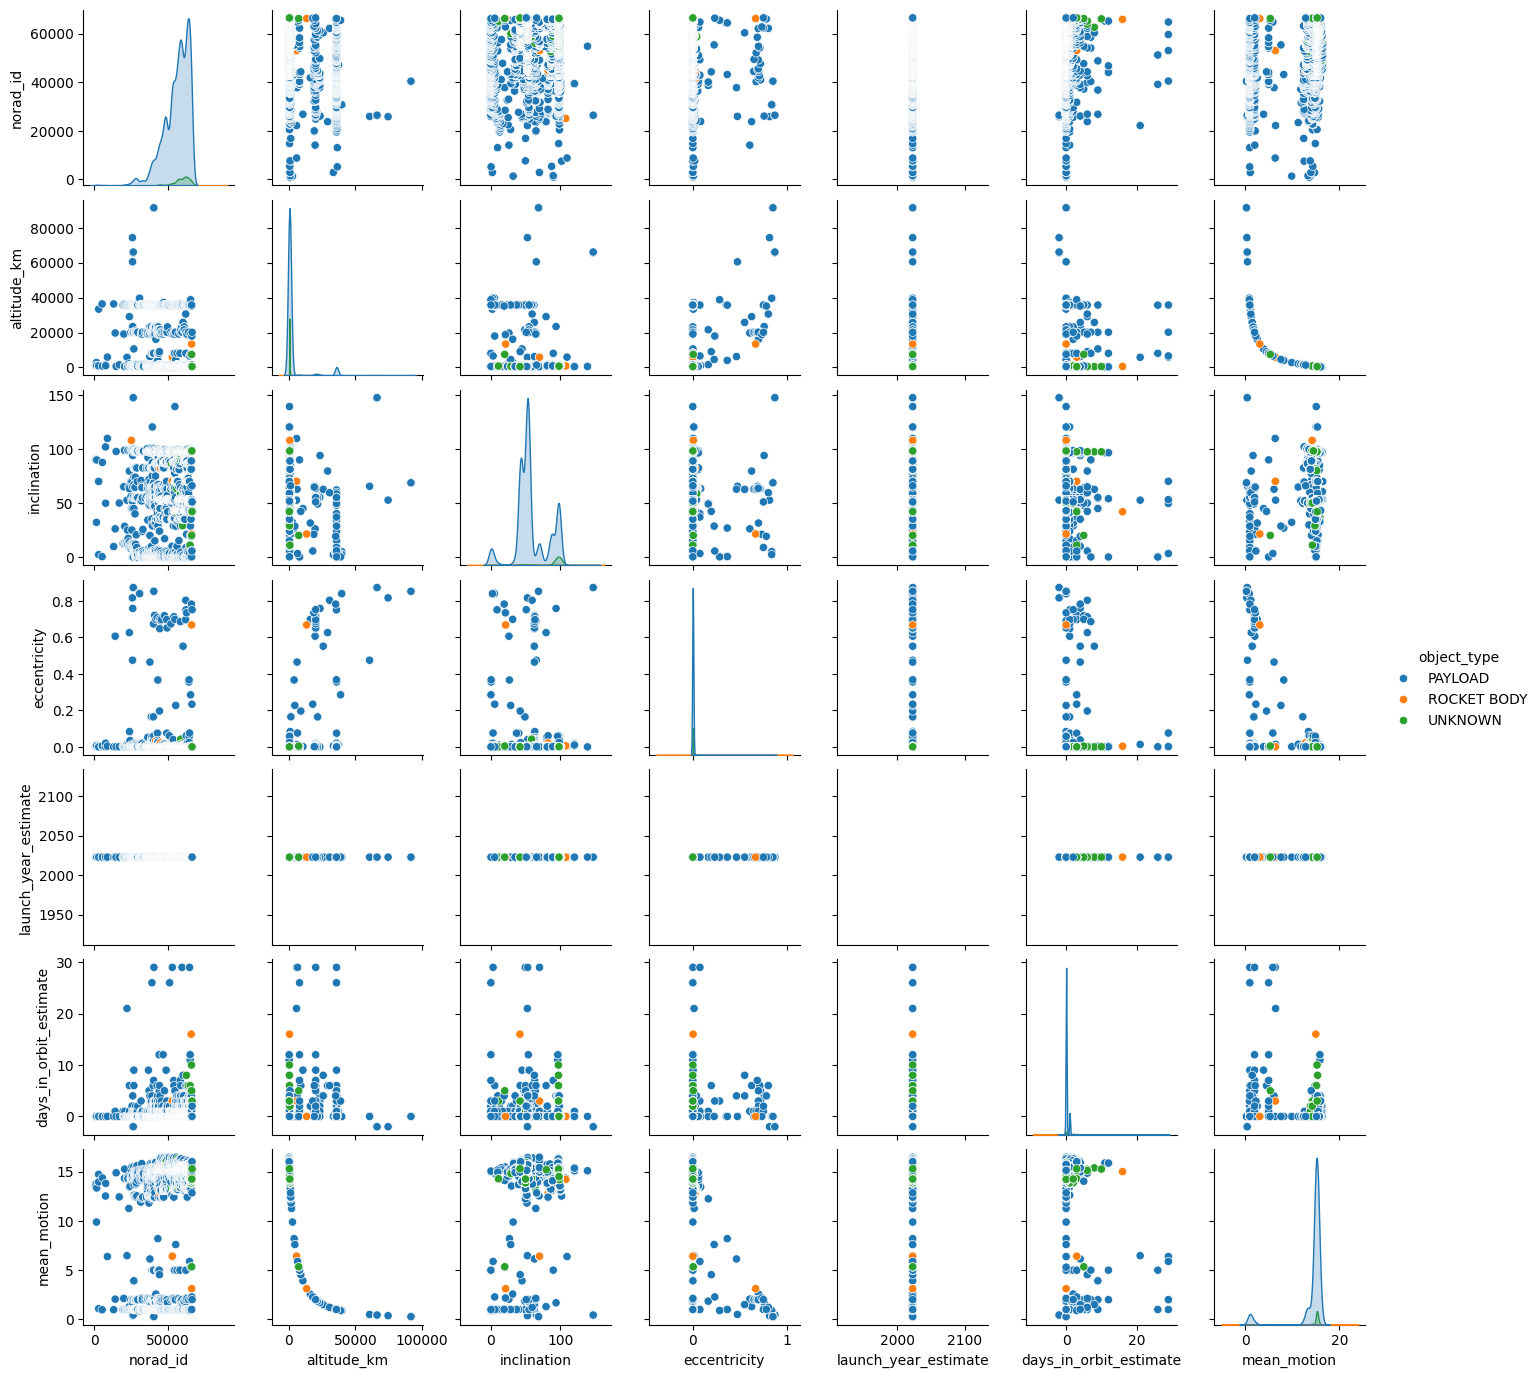

In [8]:
sns.pairplot(df, hue='object_type', height=2)